## Association analysis for CES Hybrid dataset

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori, association_rules

In [0]:
# loading preprocessed and cleaned CES hybrid dataset into a pandas dataframe
# File : data/CES/preprocessed_ces_hybrid.csv
DATA_PATH = '/content/preprocessed_ces_hybrid.csv'
data = pd.read_csv(DATA_PATH)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57860 entries, 0 to 57859
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           57860 non-null  int64 
 1   city         57860 non-null  object
 2   income       57860 non-null  object
 3   members      57860 non-null  object
 4   description  57860 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.2+ MB


In [8]:
data.shape

(57860, 5)

In [9]:
data.head()

,id,city,income,members,description
0,10001,Belem,25_to_43,4,beef_liver
1,10001,Belem,25_to_43,4,beer_snacks
2,10001,Belem,25_to_43,4,beetroot
3,10001,Belem,25_to_43,4,black_grapes
4,10001,Belem,25_to_43,4,borlotti_beans


In [11]:
# The columns of our dataset?
cols = data.columns
print('Columns in our data: ', list(cols))

Columns in our data:  ['id', 'city', 'income', 'members', 'description']


In [0]:
data['quantity'] = 1

In [14]:
data.head()

,id,city,income,members,description,quantity
0,10001,Belem,25_to_43,4,beef_liver,1
1,10001,Belem,25_to_43,4,beer_snacks,1
2,10001,Belem,25_to_43,4,beetroot,1
3,10001,Belem,25_to_43,4,black_grapes,1
4,10001,Belem,25_to_43,4,borlotti_beans,1


In [15]:
#Unique items in our dataset
print('Unique Items: ', data['description'].nunique())

Unique Items:  735


In [16]:
# Different cities that the transactions are from: 
countries = list(data['city'].unique())
countries

['Belem',
 'Belo_Horizonte',
 'Curitiba',
 'Florianopolis',
 'Fortaleza',
 'Goiania',
 'Porto_Alegre',
 'Recife']

In [17]:
#Transactions for each city
d = data.groupby('city')
d.describe()

id                                    ... quantity               
                 count          mean        std      min  ...      25%  50%  75%  max
city                                                      ...                        
Belem           6140.0  10060.392671  40.479884  10001.0  ...      1.0  1.0  1.0  1.0
Belo_Horizonte  7104.0  20107.816441  60.966973  20001.0  ...      1.0  1.0  1.0  1.0
Curitiba        7459.0  40105.405684  60.086019  40001.0  ...      1.0  1.0  1.0  1.0
Florianopolis   8361.0  50102.356895  53.652008  50001.0  ...      1.0  1.0  1.0  1.0
Fortaleza       7194.0  60098.990409  66.348702  60001.0  ...      1.0  1.0  1.0  1.0
Goiania         8138.0  70096.658270  50.398211  70001.0  ...      1.0  1.0  1.0  1.0
Porto_Alegre    6847.0  80103.484592  60.060711  80001.0  ...      1.0  1.0  1.0  1.0
Recife          6617.0  90103.928820  57.320776  90001.0  ...      1.0  1.0  1.0  1.0

[8 rows x 16 columns]

In [18]:
#Now splitting data according to the city of transaction 

# Transactions done in Belem 
basket_Belem = (data[data['city'] == 'Belem'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Belem.head()

description,acai_berry,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anjou_pear,annatto,argentinian_apple,arrowroot_powder,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,battered_beef,battered_chicken_breast,battered_chicken_drumstick,battered_chicken_tapas,battered_chicken_wings,battered_whiting_fish_fillets,bay_leaf,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_foot,beef_fore_rib,beef_heart,beef_hump,beef_liver,beef_meatballs,beef_meatballs_in_tomato_sauce,beef_medallion,beef_mince,beef_mince_selection,...,turkey_burger,turnip,uncle_benns_sauce,vanilla,vegetables_mix,vegetables_pie,vienna_sausage,vinegar,vitamin_powder,vodka,waffer_biscuit,watercress,watermelon,west_indian_cherry,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,wheat_for_kibbeh,whipped_cream,whisky,whisky_imported,white_beans,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholegrain_mustard,wholemeal_wheat_bread,wine,wine_imported,yakult,yam,yeast,yellow_mustard,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
10004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
basket_Belem.shape

(139, 585)

In [20]:
# Transactions done in Belo_Horizonte 
basket_Belo_Horizonte = (data[data['city'] == 'Belo_Horizonte'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Belo_Horizonte.head()

description,acai_berry,acai_berry_pulp,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anjou_pear,annatto,argentinian_apple,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,battered_beef,battered_chicken_breast,battered_chicken_fillets,battered_chicken_tapas,battered_whiting_fish_fillets,bay_leaf,bbq_sauce,bean_sprouts,beans_other_kind,beef_broth,beef_burger,beef_chunk,beef_liver,beef_meatballs,beef_medallion,beef_mince,beef_mince_selection,beef_muscle,beef_other_cuts,beef_other_cuts_selection,beef_rib,beef_rump,beef_rump_cap,...,tomato_pulp,tomato_puree,tomato_sauce,tuna_fish,turkey,turkey_burger,turkey_meatballs,turnip,uncle_benns_sauce,vegetables_mix,vienna_sausage,vinegar,vitamin_powder,waffer_biscuit,watermelon,west_indian_cherry,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,whipped_cream,whipped_cream_reduced_fat,whisky,white_beans,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholemeal_bread,wine,wine_imported,yakult,yam,yeast,yellow_mustard,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20003,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20004,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# Transactions done in Curitiba 
basket_Curitiba = (data[data['city'] == 'Curitiba'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Curitiba.head()

description,acai_berry_pulp,ajinomoto_sauce,alphabet_pasta,amazon_papaya,annatto,argentinian_apple,arrowroot_powder,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,basil,battered_beef,battered_chicken_breast,battered_chicken_fillets,battered_chicken_tapas,battered_whiting_fish_fillets,bay_leaf,bbq_sauce,bean_sprouts,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_heart,beef_hump,beef_liver,beef_meatballs,beef_medallion,beef_mince,beef_mince_selection,beef_muscle,...,tomato_sauce,tuna_fish,turkey_burger,turnip,uncle_benns_sauce,vegetables_mix,vienna_sausage,vinegar,vitamin_powder,vodka,waffer_biscuit,watercress,watermelon,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,whipped_cream,whisky,whisky_imported,white_beans,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholegrain_mustard,wholegrain_rice,wholemeal_bread,wholemeal_toast,wholemeal_wheat_bread,wine,wine_imported,yakult,yeast,yellow_mustard,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40005,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
# Transactions done in Florianopolis 
basket_Florianopolis = (data[data['city'] == 'Florianopolis'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Florianopolis.head()

description,acai_berry_pulp,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anchovy,anjou_pear,annatto,argentinian_apple,arrowroot_powder,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,basil,battered_beef,battered_chicken_breast,battered_chicken_drumstick,battered_chicken_fillets,battered_chicken_tapas,battered_whiting_fish_fillets,bay_leaf,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_fore_rib,beef_heart,beef_hump,beef_liver,beef_meatballs,beef_medallion,beef_mince,...,uncle_benns_sauce,usa_fruit_juice,vanilla,vegetables_mix,vienna_sausage,vinegar,vitamin_powder,vodka,vodka_imported,waffer_biscuit,watercress,watermelon,west_indian_cherry,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,wheat_for_kibbeh,whipped_cream,whisky,whisky_imported,white_beans,white_rice,white_rolls_bread,white_sauce,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholegrain_mustard,wholegrain_rice,wholemeal_bread,wholemeal_toast,wholemeal_wheat_bread,wine,wine_imported,yakult,yeast,yellow_pepper,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Transactions done in Fortaleza 
basket_Fortaleza = (data[data['city'] == 'Fortaleza'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Fortaleza.head()

description,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anjou_pear,annatto,argentinian_apple,asparagus,assorted_candies,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basil,battered_chicken_breast,battered_chicken_fillets,bay_leaf,bbq_sauce,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_foot,beef_fore_rib,beef_heart,beef_hump,beef_liver,beef_mince,beef_mince_selection,beef_muscle,beef_offal,beef_other_cuts,beef_other_cuts_selection,beef_rib,beef_rump,beef_rump_cap,...,tagliatelle_pasta,tangerine,tangerine_pulp,tapioca,tartare_sauce,toddler_cereal,toddler_milk_powder,tomato,tomato_pulp,tomato_puree,turkey,turnip,vienna_sausage,vinegar,vitamin_powder,waffer_biscuit,watermelon,west_indian_cherry,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,whipped_cream,whisky,whisky_imported,white_beans,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholemeal_bread,wholemeal_wheat_bread,wine,yakult,yam,yeast,yogurt_with_fruit_pieces
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
60001,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60002,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
60003,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60004,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# Transactions done in Goiania 
basket_Goiania = (data[data['city'] == 'Goiania'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Goiania.head()

description,acai_berry_pulp,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anjou_pear,annatto,argentinian_apple,asparagus,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,basil,battered_chicken_breast,battered_chicken_fillets,battered_chicken_tapas,bay_leaf,bean_sprouts,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_foot,beef_fore_rib,beef_heart,beef_hump,beef_liver,beef_meatballs,beef_mince,beef_mince_selection,beef_muscle,beef_other_cuts,...,tomato,tomato_pulp,tomato_puree,tomato_sauce,turkey,turnip,vanilla,vegetables_mix,vienna_sausage,vinegar,vitamin,vitamin_powder,vodka,waffer_biscuit,watercress,watermelon,west_indian_cherry,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,wheat_for_kibbeh,whipped_cream,white_beans,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholemeal_bread,wholemeal_toast,wine,wine_imported,yakult,yam,yeast,yellow_mustard,yellow_pepper,yogurt_with_fruit_pieces
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
70001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# Transactions done in Porto_Alegre 
basket_Porto_Alegre = (data[data['city'] == 'Porto_Alegre'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Porto_Alegre.head()

description,acai_berry_pulp,ajinomoto_sauce,alphabet_pasta,amazon_papaya,anchovy,anjou_pear,annatto,argentinian_apple,assorted_candies,atlantic_seabob_shrimp,aubergine,avocado,bacon,bahia_beans,banana,banana_other_kind,basella,basil,battered_chicken_breast,battered_chicken_drumstick,battered_chicken_fillets,battered_chicken_tapas,battered_whiting_fish_fillets,bay_leaf,bbq_sauce,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_heart,beef_liver,beef_meatballs,beef_meatballs_in_tomato_sauce,beef_medallion,beef_mince,beef_mince_selection,beef_muscle,...,tomato_pulp,tomato_puree,tomato_sauce,tuna_fish,turnip,vegetables_mix,vienna_sausage,vinegar,vitamin,vitamin_powder,vodka,vodka_imported,waffer_biscuit,watercress,watermelon,west_indian_cherry_pulp,wheat_flour_special,wheat_flour_with_yeast,whipped_cream,whisky,whisky_imported,white_rice,white_rolls_bread,white_sauce,white_split_tin_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholegrain_rice,wholemeal_bread,wholemeal_toast,wholemeal_wheat_bread,wine,wine_imported,yakult,yeast,yellow_pepper,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
80001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
80002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
80004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Transactions done in Recife 
basket_Recife = (data[data['city'] == 'Recife'].groupby(['id', 'description'])['quantity']
                .sum().unstack().reset_index()
                .fillna(0)
                .set_index('id'))
  
basket_Recife.head()

description,acai_berry,ajinomoto_sauce,amazon_papaya,annatto,argentinian_apple,arrowroot_powder,assorted_candies,aubergine,avocado,baby_potato,bacon,banana,banana_other_kind,basella,basil,battered_chicken_breast,battered_chicken_tapas,battered_chicken_wings,bay_leaf,beans_other_kind,beef_breast,beef_brisket,beef_broth,beef_burger,beef_chunk,beef_flank,beef_foot,beef_hump,beef_liver,beef_meatballs,beef_mince,beef_mince_selection,beef_muscle,beef_offal,beef_other_cuts,beef_other_cuts_selection,beef_rib,beef_rump,beef_rump_cap,beef_shank,...,tangerine,tangerine_pulp,tartare_sauce,tea_biscuits,toddler_cereal,toddler_milk_powder,tomato,tomato_pulp,tomato_puree,tomato_sauce,tuna_fish,turnip,uncle_benns_sauce,vienna_sausage,vinegar,vitamin,vitamin_powder,vodka,waffer_biscuit,watermelon,west_indian_cherry,wheat_flour_special,wheat_flour_with_yeast,whipped_cream,whipped_cream_reduced_fat,whisky,white_beans,white_rice,white_rolls_bread,whiting_fish,whiting_fish_fillets,whole_oats,whole_wheat_flour,wholegrain_mustard,wine,wine_imported,yakult,yeast,yogurt_with_fruit_pieces,yogurt_with_honey
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
#Defining hot encoding function to make data suitable for apriori

def hot_encode(x): 
    if( x == 1):
        return 1
    if( x < 1):
        return 0


In [0]:
#Encoding the datasets

basket_encoded = basket_Belem.applymap(hot_encode)
basket_Belem = basket_encoded 

basket_encoded = basket_Belo_Horizonte.applymap(hot_encode)
basket_Belo_Horizonte = basket_encoded 

basket_encoded = basket_Curitiba.applymap(hot_encode)
basket_Curitiba = basket_encoded 

basket_encoded = basket_Florianopolis.applymap(hot_encode)
basket_Florianopolis = basket_encoded 
 
basket_encoded = basket_Fortaleza.applymap(hot_encode)
basket_Fortaleza = basket_encoded 

basket_encoded = basket_Goiania.applymap(hot_encode)
basket_Goiania = basket_encoded 

basket_encoded = basket_Porto_Alegre.applymap(hot_encode)
basket_Porto_Alegre = basket_encoded 

basket_encoded = basket_Recife.applymap(hot_encode)
basket_Recife = basket_encoded 



In [29]:
#Building a model for each country 
#Using apriori analysis with min_support = 0.5

#For city Belem  
frq_items = apriori(basket_Belem, min_support = 0.5, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7) 

rules_Belem = rules.sort_values(by=['confidence','lift'],ascending=[False,False])
rules_Belem.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(butter),(vinegar),0.611511,0.877698,0.589928,0.964706,1.099132,0.053206,3.465228
9,(mayonnaise),(vinegar),0.633094,0.877698,0.597122,0.943182,1.074609,0.041457,2.152518
13,"(mayonnaise, garlic)",(vinegar),0.553957,0.877698,0.517986,0.935065,1.065361,0.031779,1.883453
11,(tomato),(vinegar),0.654676,0.877698,0.604317,0.923077,1.051702,0.029709,1.589928
0,(banana),(vinegar),0.582734,0.877698,0.517986,0.888889,1.012750,0.006521,1.100719


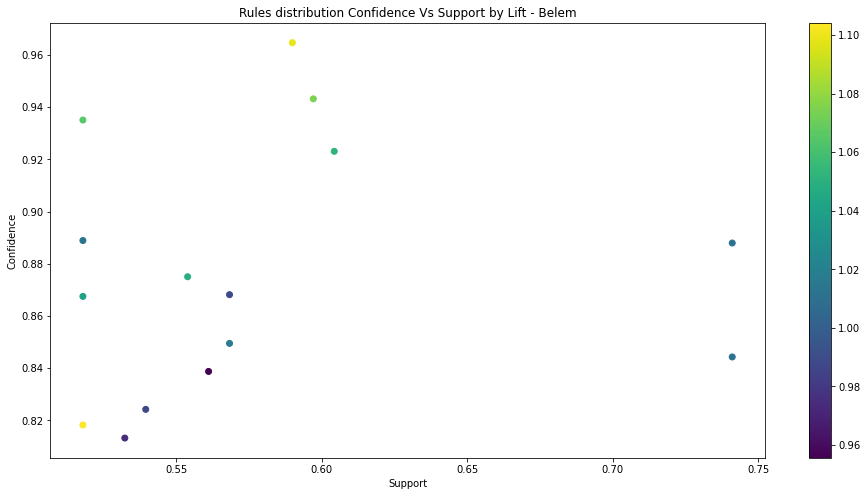

In [32]:
plt.figure(figsize=(16, 8))
plt.scatter(rules_Belem['support'], rules_Belem['confidence'], c=rules_Belem['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - Belem');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [33]:
#Building a model for each country 
#Using apriori analysis with min_support = 0.5

#For city Belo Horizonte  
frq_items = apriori(basket_Belo_Horizonte, min_support = 0.5, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules_Belo_Horizonte = association_rules(frq_items, metric ="confidence", min_threshold=0.7) 

rules_Belo_Horizonte = rules_Belo_Horizonte.sort_values(by=['confidence','lift'],ascending=[False,False])
rules_Belo_Horizonte.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,(mayonnaise),(vinegar),0.640777,0.747573,0.553398,0.863636,1.155254,0.074371,1.851133
2,(garlic),(egg),0.626214,0.805825,0.529126,0.844961,1.048566,0.024507,1.252427
3,(mayonnaise),(egg),0.640777,0.805825,0.538835,0.840909,1.043538,0.022481,1.220527
9,(mayonnaise),(french_bread),0.640777,0.805825,0.538835,0.840909,1.043538,0.022481,1.220527
10,(soy_oil),(french_bread),0.742718,0.805825,0.616505,0.830065,1.030081,0.018004,1.142644


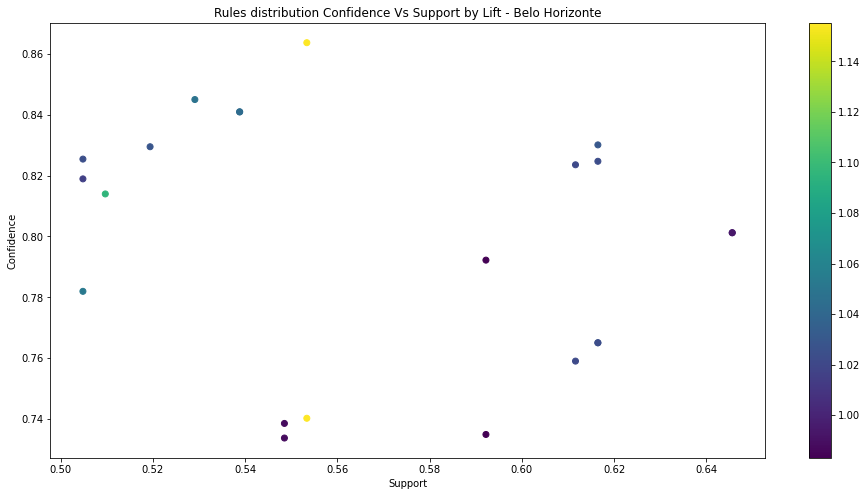

In [34]:
plt.figure(figsize=(16, 8))
plt.scatter(rules_Belo_Horizonte['support'], rules_Belo_Horizonte['confidence'], c=rules_Belo_Horizonte['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - Belo Horizonte');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [35]:
#Building a model for each country 
#Using apriori analysis with min_support = 0.5

#For city Curitiba 
frq_items = apriori(basket_Curitiba, min_support = 0.5, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules_Curitiba = association_rules(frq_items, metric ="confidence", min_threshold=0.7)

rules_Curitiba = rules_Curitiba.sort_values(by=['confidence'],ascending=False)
rules_Curitiba.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(wheat_flour_special),(egg),0.614634,0.819512,0.536585,0.873016,1.065287,0.032885,1.421341
9,(vinegar),(egg),0.678049,0.819512,0.590244,0.870504,1.062222,0.034575,1.393767
0,(chocolate_powder),(egg),0.673171,0.819512,0.560976,0.833333,1.016865,0.009304,1.082927
6,(mayonnaise),(egg),0.678049,0.819512,0.556098,0.820144,1.000771,0.000428,1.003512
5,(french_bread),(egg),0.751220,0.819512,0.614634,0.818182,0.998377,-0.000999,0.992683


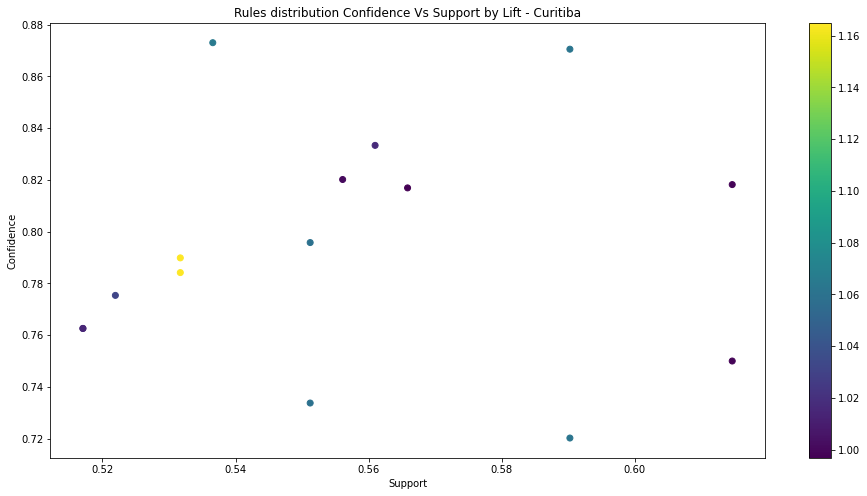

In [36]:
plt.figure(figsize=(16, 8))
plt.scatter(rules_Curitiba['support'], rules_Curitiba['confidence'], c=rules_Curitiba['lift']);
plt.title('Rules distribution Confidence Vs Support by Lift - Curitiba');
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.colorbar();

In [37]:
#Building a model for each city 
#Using apriori analysis with min_support = 0.5

#For city Florianopolis 
frq_items = apriori(basket_Florianopolis, min_support = 0.5, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7)

rules = rules.sort_values(by=['confidence'],ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
30,(sausage),(vinegar),0.566138,0.761905,0.513228,0.906542,1.189836,0.081885,2.547619
11,(creamy_white_cheese),(french_bread),0.587302,0.835979,0.513228,0.873874,1.045330,0.022256,1.300454
39,"(mayonnaise, egg)",(vinegar),0.582011,0.761905,0.507937,0.872727,1.145455,0.064500,1.870748
21,(mayonnaise),(french_bread),0.735450,0.835979,0.640212,0.870504,1.041299,0.025391,1.266608
43,"(mayonnaise, vinegar)",(french_bread),0.634921,0.835979,0.550265,0.866667,1.036709,0.019484,1.230159


In [38]:
#Building a model for each city 
#Using apriori analysis with min_support = 0.07

#For city Florianopolis 
frq_items = apriori(basket_Fortaleza, min_support = 0.07, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7) 

rules = rules.sort_values(by=['confidence'],ascending=False)
rules.head() 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1178975,"(pepper, flour, french_bread, garlic, annatto,...",(cream_cracker_biscuits),0.070423,0.685446,0.070423,1.0,1.458904,0.022152,inf
1111033,"(beans_other_kind, egg, spread_margarine, anna...",(potato),0.070423,0.525822,0.070423,1.0,1.901786,0.033393,inf
1111291,"(beetroot, egg, chocolate_powder, cream_cracke...",(banana),0.070423,0.765258,0.070423,1.0,1.306748,0.016531,inf
1111278,"(beetroot, french_bread, chocolate_powder, cre...",(egg),0.070423,0.774648,0.070423,1.0,1.290909,0.015870,inf
1111273,"(beetroot, egg, french_bread, chocolate_powder...",(banana),0.070423,0.765258,0.070423,1.0,1.306748,0.016531,inf


In [0]:
#For city Goiania 
frq_items = apriori(basket_Goiania, min_support = 0.07, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7)

rules = rules.sort_values(by=['confidence'],ascending=False)
rules.head()

In [0]:
#For city Porto_Alegre 
frq_items = apriori(basket_Porto_Alegre, min_support = 0.07, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7)

rules = rules.sort_values(by=['confidence'],ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
23180,"(potato, tomato, chocolate_powder, vinegar, ma...",(egg),0.087805,0.741463,0.087805,1.0,1.348684,0.022701,inf
19705,"(vinegar, watermelon, saveloy, soy_oil)",(egg),0.078049,0.741463,0.078049,1.0,1.348684,0.020178,inf
19683,"(soy_oil, saveloy, wheat_flour_special, soda_b...",(egg),0.073171,0.741463,0.073171,1.0,1.348684,0.018917,inf
19671,"(vinegar, saveloy, soda_bottle_large, soy_oil)",(egg),0.082927,0.741463,0.082927,1.0,1.348684,0.021440,inf
19655,"(potato, vinegar, tomato, sugar)",(egg),0.073171,0.741463,0.073171,1.0,1.348684,0.018917,inf


In [0]:
#For city Recife 
frq_items = apriori(basket_Recife, min_support = 0.07, use_colnames = True)
  
# Collecting the inferred rules in a dataframe 
# use association_rules with metric='confidence' and mininum threshold = 0.7 (70% of confidence or above)
rules = association_rules(frq_items, metric ="confidence", min_threshold=0.7)

rules = rules.sort_values(by=['confidence'],ascending=False)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
207297,"(egg, coriander, flour, cucumber, vinegar)",(garlic),0.070,0.805,0.070,1.0,1.242236,0.01365,inf
142044,"(banana, canned_sardine, french_bread, waterme...",(vinegar),0.070,0.810,0.070,1.0,1.234568,0.01330,inf
95080,"(guava_candy, cucumber, mayonnaise, canned_sar...",(vinegar),0.095,0.810,0.095,1.0,1.234568,0.01805,inf
142034,"(banana, canned_sardine, tomato, vinegar, cann...",(french_bread),0.070,0.875,0.070,1.0,1.142857,0.00875,inf
142033,"(banana, canned_sardine, tomato, french_bread,...",(vinegar),0.070,0.810,0.070,1.0,1.234568,0.01330,inf
